In [81]:
import numpy as np # linear algebra

In [152]:
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns # better visualiztion from plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [155]:
df = pd.read_csv("nigeria_houses_data.csv")
df.sort_values(by="price").tail(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
20602,4.0,5.0,5.0,4.0,Block of Flats,Ikoyi,Lagos,1.500000e+10
13490,3.0,3.0,3.0,4.0,Semi Detached Duplex,Ajah,Lagos,4.200000e+10
17383,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,5.000000e+10
15806,5.0,5.0,5.0,1.0,Detached Duplex,Ifako-Ijaiye,Lagos,5.500000e+10
15836,5.0,6.0,7.0,4.0,Terraced Duplexes,Guzape District,Abuja,8.500000e+10
7098,5.0,5.0,6.0,4.0,Semi Detached Duplex,Lekki,Lagos,1.250000e+11
4327,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos,1.600000e+11
15962,9.0,9.0,1.0,4.0,Detached Duplex,Lekki,Lagos,3.500000e+11
6632,4.0,4.0,5.0,4.0,Semi Detached Duplex,Ikoyi,Lagos,4.500000e+11
4096,7.0,7.0,8.0,8.0,Detached Duplex,Ikoyi,Lagos,1.800000e+12


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [85]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [86]:
# Data Exploratory

In [87]:
state_no = df.state.nunique()

In [88]:
state_no

25

In [89]:
# Unique number of towns 
towns_no = df.town.nunique()

In [90]:
towns_no

189

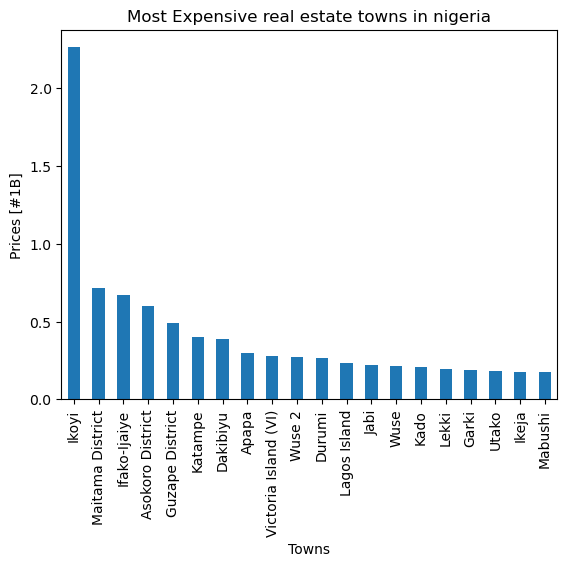

In [91]:
# small visualization using matplotlib
(
(df.groupby("town")['price']
 .mean()/1e9)
 .sort_values(ascending = False)
 .head(20)
 .plot(kind = "bar",
      xlabel = 'Towns',
      ylabel = "Prices [#1B]",
      title = "Most Expensive real estate towns in nigeria")   
);

In [92]:
"""During the analysis, a clear distinction emerged between the houses in Ifako-Ijaiye and those in the Maitama District. It was evident that there were outliers influencing this observation. Upon closer examination, it was discovered that a house in Ifako-Ijaiye was being sold for an astonishing amount of 55 billion naira, which seemed highly unreasonable.
\n
Similarly, although houses in Ikoyi were already known to be expensive, the magnitude of the price gap was unexpected. Further investigation revealed that one particular house was being sold for a staggering 1.8 trillion naira. Whether or not the house warranted such a high price is not the focus of the discussion; however, its presence had a detrimental effect on the overall dataset."""

'During the analysis, a clear distinction emerged between the houses in Ifako-Ijaiye and those in the Maitama District. It was evident that there were outliers influencing this observation. Upon closer examination, it was discovered that a house in Ifako-Ijaiye was being sold for an astonishing amount of 55 billion naira, which seemed highly unreasonable.\n\n\nSimilarly, although houses in Ikoyi were already known to be expensive, the magnitude of the price gap was unexpected. Further investigation revealed that one particular house was being sold for a staggering 1.8 trillion naira. Whether or not the house warranted such a high price is not the focus of the discussion; however, its presence had a detrimental effect on the overall dataset.'

In [93]:
# LOOKING FOR OUTLIERS

In [94]:
print(df[df["town"] == "Ikoyi"].max())
print(df[df['town'] == 'Ifako-Ijaiye'].max())

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                       7.0
bathrooms                      8.0
toilets                        8.0
parking_space                  8.0
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object


In [95]:
# Removing Outliers 

In [96]:
trim_df = q1, q9 = df.price.quantile([0.15,0.85])
mask_df = df.price.between(q1,q9)
trimmed_df = df[mask_df]
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0
8,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,Lagos,80000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [97]:
few_records = trimmed_df.state.value_counts()
few_records

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

In [98]:
# Removing States with few entries to stabilize the average
trimmed_df = trimmed_df[~trimmed_df.state.isin(few_records[few_records < 100].index)]

In [99]:
trimmed_df.state.value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

In [100]:
"""This chart looks a lot more accurate than the previous one. Ikoyi is still on top which is expected but now, it is not so far away from the other expensive towns."""

'This chart looks a lot more accurate than the previous one. Ikoyi is still on top which is expected but now, it is not so far away from the other expensive towns.'

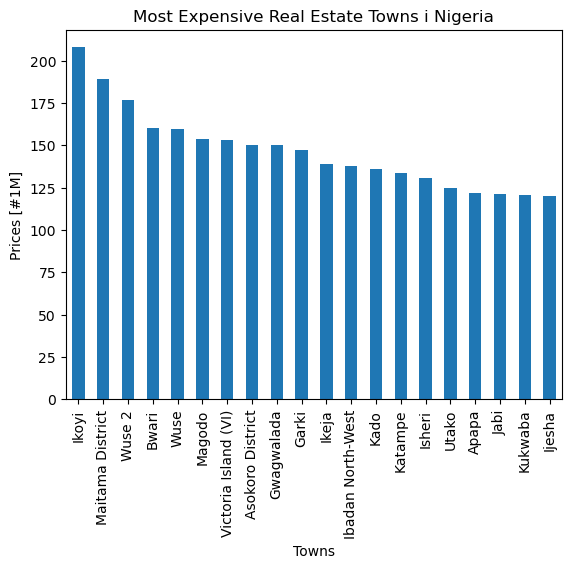

In [101]:
((trimmed_df.groupby("town")['price']
 .mean()/1e6)
 .sort_values(ascending = False)
 .head(20)
 .plot(kind = "bar",
      xlabel = "Towns",
      ylabel = "Prices [#1M]",
      title = "Most Expensive Real Estate Towns i Nigeria")
);

In [102]:
"""During the analysis, a clear distinction emerged between the houses in Ifako-Ijaiye and those in the Maitama District. It was evident that there were outliers influencing this observation. Upon closer examination, it was discovered that a house in Ifako-Ijaiye was being sold for an astonishing amount of 55 billion naira, which seemed highly unreasonable.

Similarly, although houses in Ikoyi were already known to be expensive, the magnitude of the price gap was unexpected. Further investigation revealed that one particular house was being sold for a staggering 1.8 trillion naira. Whether or not the house warranted such a high price is not the focus of the discussion; however, its presence had a detrimental effect on the overall dataset."""

'During the analysis, a clear distinction emerged between the houses in Ifako-Ijaiye and those in the Maitama District. It was evident that there were outliers influencing this observation. Upon closer examination, it was discovered that a house in Ifako-Ijaiye was being sold for an astonishing amount of 55 billion naira, which seemed highly unreasonable.\n\nSimilarly, although houses in Ikoyi were already known to be expensive, the magnitude of the price gap was unexpected. Further investigation revealed that one particular house was being sold for a staggering 1.8 trillion naira. Whether or not the house warranted such a high price is not the focus of the discussion; however, its presence had a detrimental effect on the overall dataset.'

In [103]:
# States  with the highest mean prices

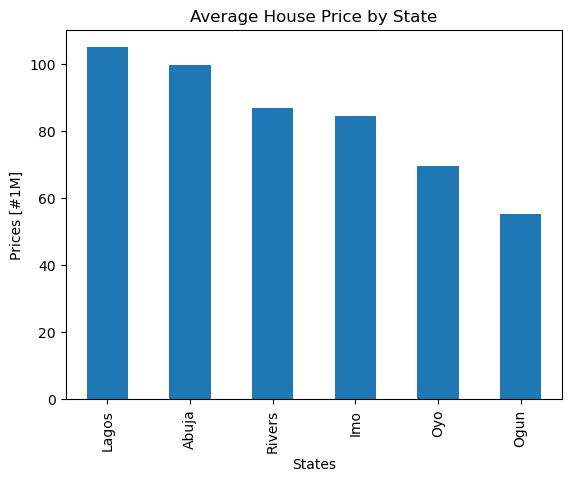

In [104]:
(
    (trimmed_df.groupby("state")['price'].mean()/1e6)
    .sort_values(ascending = False)
    .plot(kind = "bar",
         xlabel = "States",
         ylabel = "Prices [#1M]",
         title = 'Average House Price by State')
);

In [105]:

trimmed_df.state.value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

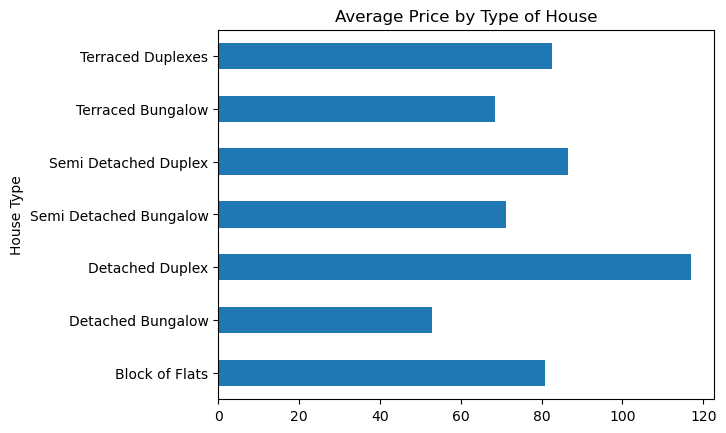

In [106]:
((
trimmed_df.groupby("title")["price"]
.mean()/1e6)
.plot(kind = 'barh',
     xlabel = 'House Type',
     ylabel = "Prices [#1M]",
     title = 'Average Price by Type of House')    
);

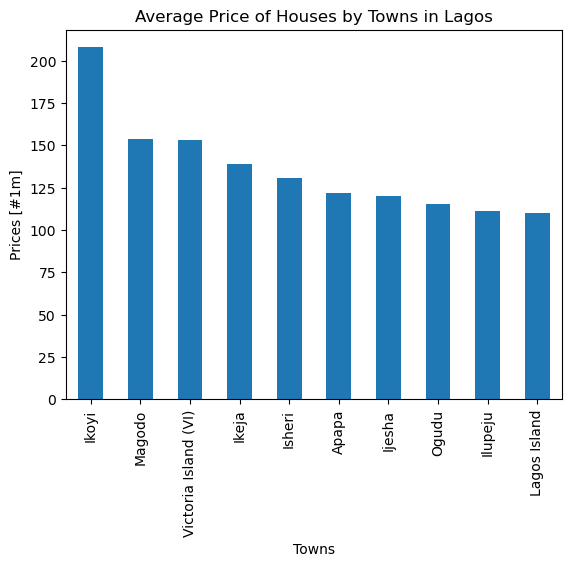

In [107]:
trimmed_df_lagos = trimmed_df[trimmed_df["state"] == "Lagos"]
(
    (trimmed_df_lagos.groupby("town")["price"].mean()/1e6)
    .sort_values(ascending = False)
    .head(10).plot(kind='bar',
                  xlabel = "Towns",
                  ylabel = "Prices [#1m]",
                  title = "Average Price of Houses by Towns in Lagos")
);

In [108]:
trimmed_df_lagos['town'].value_counts()

Lekki                   9134
Ajah                    1797
Ikeja                    609
Magodo                   360
Victoria Island (VI)     300
Ikoyi                    255
Ibeju Lekki              193
Isheri North             183
Isolo                    164
Surulere                 106
Alimosho                  92
Yaba                      75
Maryland                  58
Agege                     56
Ojodu                     55
Gbagada                   51
Ikorodu                   49
Ogudu                     43
Amuwo Odofin              40
Ilupeju                   29
Ipaja                     22
Ikotun                    21
Shomolu                   15
Ojo                       15
Isheri                    15
Ketu                      13
Ifako-Ijaiye              13
Oshodi                     9
Ejigbo                     7
Idimu                      4
Kosofe                     3
Lagos Island               3
Agbara-Igbesa              3
Apapa                      3
Ijaiye        

In [109]:
df_lekki = trimmed_df_lagos[trimmed_df_lagos['town']=="Lekki"].reset_index()
df_lekki.drop(columns=["index","state"],inplace=True)

In [110]:
df_lekki.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,9134.000000,9134.000000,9134.000000,9134.000000,9.134000e+03
mean,4.471097,4.697613,5.427414,3.986643,1.074863e+08
std,0.681831,0.763707,0.760587,1.121365,4.855801e+07
min,1.000000,1.000000,1.000000,1.000000,3.500000e+07
25%,4.000000,4.000000,5.000000,4.000000,7.000000e+07
50%,5.000000,5.000000,5.000000,4.000000,9.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.300000e+08
max,9.000000,9.000000,9.000000,9.000000,2.600000e+08


In [111]:
# Renaming the title column house_type

In [112]:
df_lekki.rename({"title":"house_type"},axis = 1, inplace = True)
df_lekki.head()

,bedrooms,bathrooms,toilets,parking_space,house_type,town,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,120000000.0
1,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,75000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,65000000.0
3,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,200000000.0
4,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,65000000.0


Detached Duplex           6259
Semi Detached Duplex      1376
Terraced Duplexes         1232
Block of Flats             169
Semi Detached Bungalow      41
Detached Bungalow           38
Terraced Bungalow           19
Name: house_type, dtype: int64


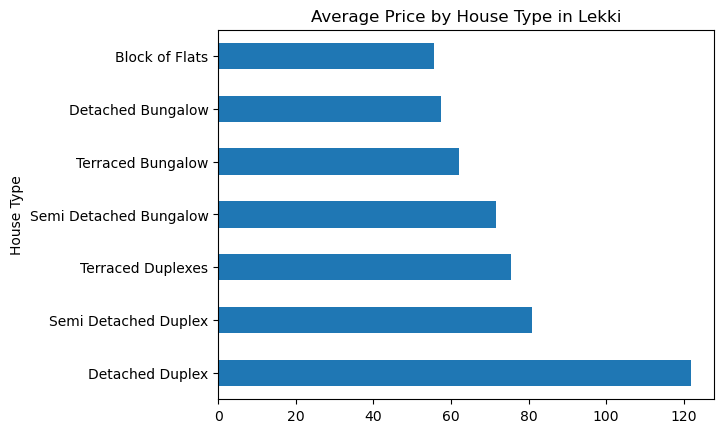

In [113]:
print(df_lekki["house_type"].value_counts())
(
(df_lekki.groupby("house_type")["price"].mean()/1e6)
.sort_values(ascending=False).
 plot(kind='barh',
     xlabel = "House Type",
     ylabel = "Prices [#1m]",
     title = "Average Price by House Type in Lekki")   
);

In [114]:
df_lekki["total_rooms"] = df.bedrooms + df.bathrooms + df.toilets + df.parking_space

# swap the positions of the price and total_rooms columns
cols = list(df_lekki.columns)
cols[-1], cols[-2] = cols[-2], cols[-1]
df_lekki = df_lekki[cols]

In [115]:
df_lekki

,bedrooms,bathrooms,toilets,parking_space,house_type,town,total_rooms,price
0,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,20.0,120000000.0
1,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,18.0,75000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,18.0,65000000.0
3,1.0,1.0,1.0,1.0,Detached Duplex,Lekki,19.0,200000000.0
4,4.0,5.0,6.0,3.0,Semi Detached Duplex,Lekki,15.0,65000000.0
...,...,...,...,...,...,...,...,...
9129,4.0,4.0,5.0,3.0,Terraced Duplexes,Lekki,26.0,75000000.0
9130,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,9.0,110000000.0
9131,3.0,4.0,4.0,5.0,Detached Duplex,Lekki,17.0,80000000.0
9132,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,21.0,68000000.0


-0.0020368542501899936

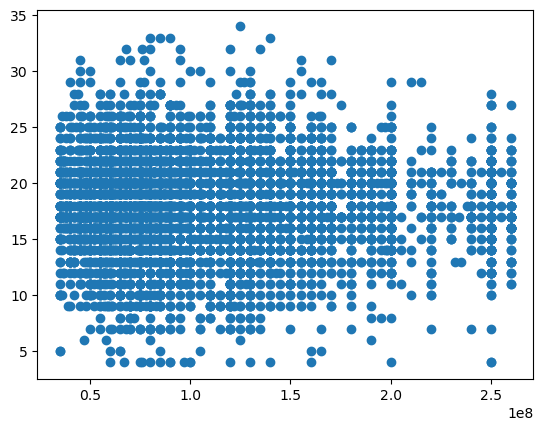

In [116]:
plt.scatter(
    x = df_lekki.price,
    y = df_lekki.total_rooms
)
df_lekki.price.corr(df_lekki.total_rooms)

               bedrooms  bathrooms   toilets  parking_space  total_rooms  \
bedrooms       1.000000   0.750079  0.768076       0.315122     0.010758   
bathrooms      0.750079   1.000000  0.762202       0.306990    -0.006481   
toilets        0.768076   0.762202  1.000000       0.299910     0.011514   
parking_space  0.315122   0.306990  0.299910       1.000000     0.007555   
total_rooms    0.010758  -0.006481  0.011514       0.007555     1.000000   
price          0.525320   0.405033  0.411606       0.274123    -0.002037   

                  price  
bedrooms       0.525320  
bathrooms      0.405033  
toilets        0.411606  
parking_space  0.274123  
total_rooms   -0.002037  
price          1.000000  


<AxesSubplot:>

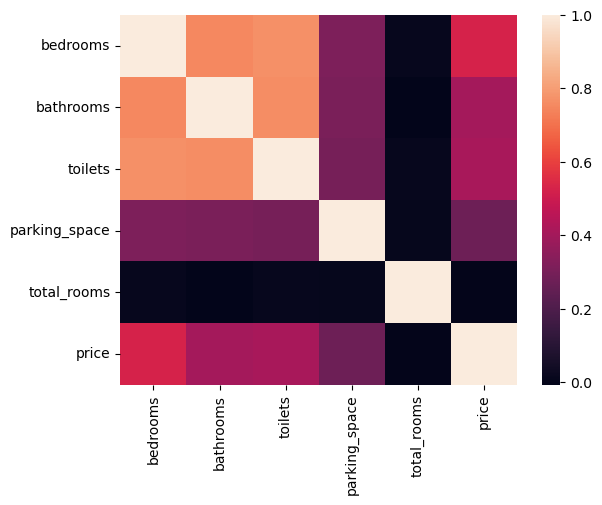

In [117]:
corr = df_lekki.corr()
print(corr)
sns.heatmap(corr)

In [118]:
# DRop multi-collinearity and low-cardinality features and feature not correlating with target

In [119]:
df_lekki.drop(columns=["bathrooms","toilets","town","total_rooms"], inplace = True)

In [120]:
trim = q1, q9 = df_lekki.price.quantile([0.1,0.9])
mask = df_lekki.price.between(q1,q9)
trimmed_df_lekki = df_lekki[mask]

In [121]:
trimmed_df_lekki.price.sort_values().head()

7397    55000000.0
6960    55000000.0
644     55000000.0
6936    55000000.0
3619    55000000.0
Name: price, dtype: float64

In [122]:
trimmed_df_lekki.head()
trimmed_df_lekki
trimmed_df_lekki.max()

bedrooms                       8.0
parking_space                  9.0
house_type       Terraced Duplexes
price                  170000000.0
dtype: object

In [123]:
#finally split data 

In [124]:
target = "price"
features = (trimmed_df_lekki.drop(columns = target)).columns
y = trimmed_df_lekki[target]
X = trimmed_df_lekki[features]
X
y


0       120000000.0
1        75000000.0
2        65000000.0
4        65000000.0
5        70000000.0
           ...     
9129     75000000.0
9130    110000000.0
9131     80000000.0
9132     68000000.0
9133     65000000.0
Name: price, Length: 7526, dtype: float64

In [125]:
# Create the pipeline with only OneHotEncoder
pipeline = make_pipeline(OneHotEncoder(use_cat_names=True))

# Fit and transform the data using the pipeline
X_enc = pipeline.fit_transform(X)



In [126]:
X_enc

,bedrooms,parking_space,house_type_Detached Duplex,house_type_Semi Detached Duplex,house_type_Terraced Duplexes,house_type_Block of Flats,house_type_Detached Bungalow,house_type_Terraced Bungalow,house_type_Semi Detached Bungalow
0,4.0,4.0,1,0,0,0,0,0,0
1,4.0,2.0,0,1,0,0,0,0,0
2,4.0,4.0,1,0,0,0,0,0,0
4,4.0,3.0,0,1,0,0,0,0,0
5,4.0,4.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9129,4.0,3.0,0,0,1,0,0,0,0
9130,4.0,4.0,0,1,0,0,0,0,0
9131,3.0,5.0,1,0,0,0,0,0,0
9132,4.0,4.0,1,0,0,0,0,0,0


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.2, random_state = 42)

In [128]:
print(len(X_test))
print(round(len(X_enc)*0.2))


1506
1505


In [129]:
""" Model Baseline
"""

' Model Baseline\n'

In [130]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean price: 101915054.8179402
Baseline MAE: 28144187.62008587


In [131]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.29727884096269963

In [132]:
#Using cross_validation to test it multiple times to see scores

from sklearn.model_selection import  ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X_enc,y,cv=cv)

array([0.27966274, 0.28897156, 0.29296702, 0.30480307, 0.26553127])

In [133]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.29727884096269963

In [134]:
#As a data scientist check multiple algorithm to get best score
# we use gridsearch API

from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridSearchCV(X_enc,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree': {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores = []
    #adding cross validation to shuffle tes
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X_enc,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])    


In [135]:
#Winner should be linear regression
find_best_model_using_gridSearchCV(X_enc,y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.792e+17, tolerance: 6.170e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.813e+17, tolerance: 6.134e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+16, tolerance: 

,model,best_score,best_params
0,linear_regression,0.286387,{'normalize': True}
1,lasso,0.286387,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.315972,"{'criterion': 'mse', 'splitter': 'random'}"


In [136]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameters for the Decision Tree
tree_params = {
    'criterion': 'mse',
    'splitter': 'best'
}

# Create the Decision Tree model with the specified parameters
model = DecisionTreeRegressor(criterion='mse', splitter='best')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [137]:
predictions

array([1.19848270e+08, 1.18655936e+08, 1.19848270e+08, ...,
       1.19848270e+08, 1.19848270e+08, 7.85039370e+07])

In [138]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_pred_training, y_train))

Training MAE: 20485061.18422693


<AxesSubplot:>

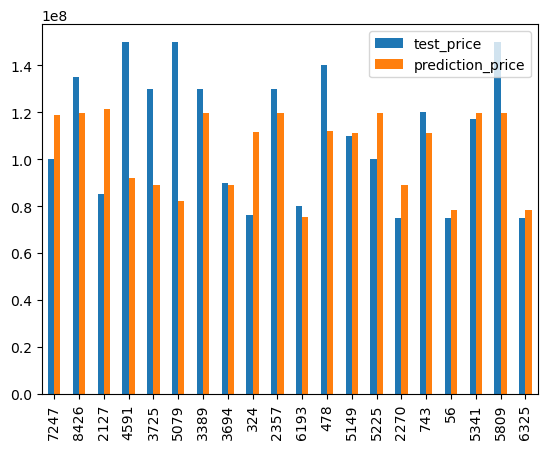

In [139]:
prediction_data = model.predict(X_test)
model_result = pd.DataFrame({'test_price': y_test, "prediction_price": prediction_data})
model_result.tail(20).plot(kind="bar")

In [140]:
print("Test MAE:", mean_absolute_error(prediction_data, y_test))

Test MAE: 20140580.118874658


In [141]:
trimmed_df_lekki.iloc[4902]

bedrooms                     5.0
parking_space                6.0
house_type       Detached Duplex
price                140000000.0
Name: 5935, dtype: object

In [142]:
"""Result Communication"""

'Result Communication'

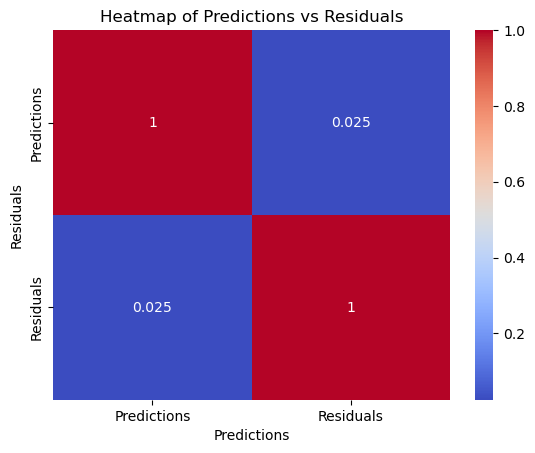

In [143]:
# Calculate the residuals (difference between predictions and true values)
residuals = predictions - y_test

# Create a dataframe combining the predictions and residuals
heatmap_data = pd.DataFrame({'Predictions': predictions, 'Residuals': residuals})

# Create a correlation matrix for the heatmap
correlation_matrix = heatmap_data.corr()

# Generate the heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels and title
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Heatmap of Predictions vs Residuals')

# Display the heatmap
plt.show()

In [144]:
importance = model.feature_importances_
print("Feature importances:")
print(importance)


Feature importances:
[8.63365711e-01 5.19027978e-02 1.66510033e-02 4.64293597e-02
 1.55462932e-02 1.08131410e-03 1.15291600e-04 7.91901268e-04
 4.11632810e-03]


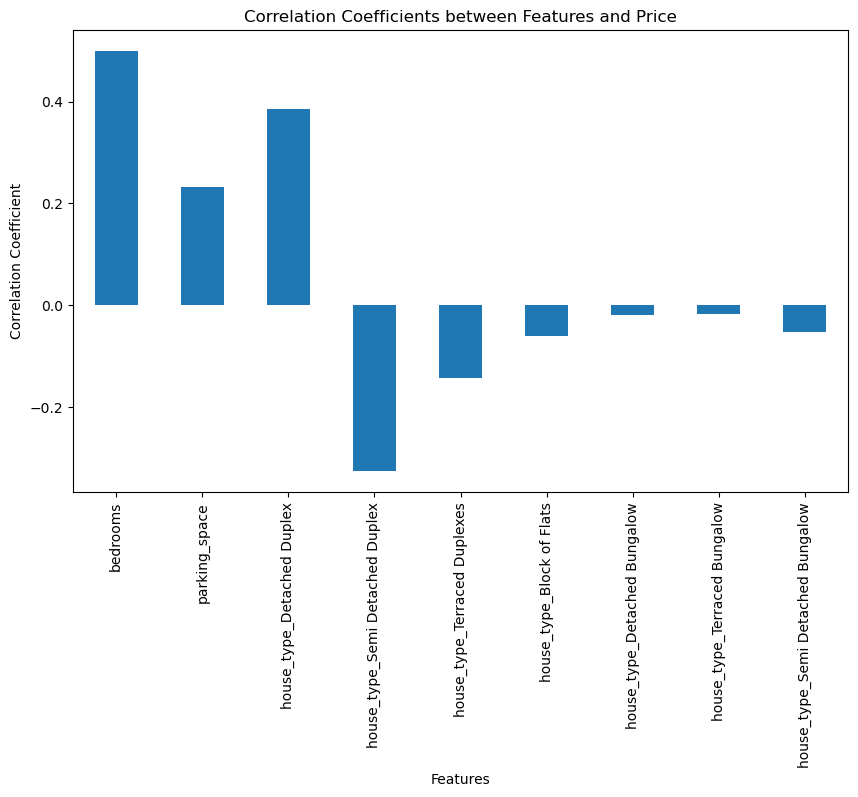

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation coefficients between features and price
correlations = X_enc.corrwith(y)

# Create a bar plot
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Features and Price')

# Display the plot
plt.show()


In [146]:
"""The bar plot provides evidence that the number of bedrooms has the most significant impact on the price of a house. Additionally, the plot reveals that if a house is classified as a Semi Detached Bungalow, its price depreciates by approximately 18 million naira."""

'The bar plot provides evidence that the number of bedrooms has the most significant impact on the price of a house. Additionally, the plot reveals that if a house is classified as a Semi Detached Bungalow, its price depreciates by approximately 18 million naira.'

In [147]:
def make_prediction(bedrooms, parking_space, house_type):
    data = {
        "bedrooms": bedrooms,
        "parking_space": parking_space,
        "house_type": house_type
    }
    df = pd.DataFrame(data, index=[0])

    # Perform one-hot encoding on the 'house_type' column
    df_encoded = pd.get_dummies(df)
    
     # Get the column names from the training data used for the model
    model_columns = X_train.columns.to_list()

    # Ensure the encoded dataframe has the same columns as the training data
    df_encoded = df_encoded.reindex(columns=model_columns, fill_value=0)

    prediction = model.predict(df_encoded).round(2)[0]
    return f"Predicted apartment price: ₦{prediction}"


In [148]:
"""Testing function"""
make_prediction(4, 2, "Block of Flats")

'Predicted apartment price: ₦113000000.0'

In [149]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [158]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train1["bedrooms"].min(),
        max=X_train1["bedrooms"].max(),
        value=X_train1["bedrooms"].mean(),
    ),
    parking_space=IntSlider(
        min=X_train1["parking_space"].min(),
        max=X_train1["parking_space"].max(),
        step=1,
        value=X_train1["parking_space"].mean(),
    ),
    house_type=Dropdown(options=sorted(X_train1["house_type"].unique())),
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=8, min=1), IntSlider(value=3, description…

In [159]:
import pickle
with open('lekki_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [160]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))